In [197]:
import pandas as pd
import matplotlib.pyplot as plt
import re
import datetime as dt
%matplotlib inline

In [309]:
# Open whatsapp chat backup
with open('china.txt', 'r', encoding="utf-8") as f:
    data_raw = f.read()


In [310]:
# Split text into messages
split = re.split('(\d+/\d+/\d+,\s\d+:\d+:\d+\sA?P?M:\s)', data_raw)
del split[0]
#print(len(split)) # number of seperated messages 
data_date_message = [split[i]+split[i+1] for i in range(len(split)) if i % 2 == 0] 

In [311]:
# Delete all status messages like "Jan has left" or "Jan has changed his security code." except "<image omitted>"
copied_list = list(data_date_message)
for e in copied_list:
    if e.count(':') < 4: #status messages have less than 4 colons
        data_date_message.remove(e)

In [312]:
# Split each message into a date, a sender and a message text
dates = []
senders = []
messages = []
for e in data_date_message:
    date = re.findall('(^\d+/\d+/\d+.*\sA?P?M):', e)
    dates.append(date[0])

    sender = re.findall('[^:]*:[^:]*:[^:]*:\s([^:]+):.*', e)
    senders.append(sender[0])

    message = re.findall('.+:.+:.+:.+:\s(.*)', e)
    messages.append(message[0])
   

In [313]:
# Check if all lists have the same size
if len(dates) == len(senders) == len(messages):
    print("All lists have the same size!")
else: 
    print("Error: lists have different sizes")

All lists have the same size!


In [314]:
# Create pandas dataframe
df = pd.DataFrame({'sender': senders, 'dates': dates, 'messages': messages})

In [315]:
# Convert dates from string to datetime format 
df['dates'] = pd.to_datetime(df['dates'], format='%m/%d/%y, %I:%M:%S %p')

In [316]:
# Calculate total numbers
def total_numbers():
    result = dict()
    
    result['total_number_messages'] = df['messages'].count()
    result['total_number_images'] = len(df[df['messages'].str.contains('image omitted')])
    result['total_number_days'] = (df['dates'].max() - df['dates'].min()).days
    
    total_number_words = 0
    total_number_letters = 0
    for e in df['messages']:
        total_number_letters += len(e)
        total_number_words += len(re.findall("[a-zA-Z_]+", e))
    result['total_number_words'] = total_number_words
    result['total_number_letters'] = total_number_letters
    
    return result

In [328]:
# Print total numbers
for key, value in total_numbers().items():
    print(key + ": " + str(value))

total_number_messages: 3404
total_number_images: 129
total_number_days: 427
total_number_words: 26042
total_number_letters: 147639


In [330]:
# Calculate averages
def averages():
    result = dict()
    total_number_words = 0
    total_number_letters = 0
    for e in df['messages']:
        total_number_letters += len(e)
        total_number_words += len(re.findall("[a-zA-Z_]+", e))
    mean_words = total_number_words/df['messages'].count()
    mean_messages = df['messages'].count()/int((df['dates'].max() - df['dates'].min()).days)
    mean_letters = total_number_letters/df['messages'].count()
    
    result['mean_messages_per_day'] = mean_messages
    result['mean_words_per_message'] = mean_words
    result['mean_letters_per_message'] = mean_letters
    
    return result

In [331]:
# Print averages
for key, value in averages().items():
    print(key + ": " + str(value))

mean_messages_per_day: 7.9718969555
mean_words_per_message: 7.65041128085
mean_letters_per_message: 43.3722091657


In [332]:
# Calculate several activity stats
def activity():
    result = dict()
    result['activity_over_day'] = df.groupby(df['dates'].dt.hour)['messages'].count()
    result['activity_over_week'] = df.groupby(df['dates'].dt.dayofweek)['messages'].count()
    result['activity_over_year'] = df.groupby(df['dates'].dt.month)['messages'].count()
    result['activity_members_messages'] = df.groupby('sender')['messages'].count()
    result['acitivity_members_images'] = df[df['messages'].str.contains('image omitted')].groupby('sender')['messages'].count()
    
    return result

In [333]:
# # Print activity stats
# for key, value in activity().items():
#    print(key + ": " + str(value))

In [334]:
activity_result = activity()

<Container object of 7 artists>

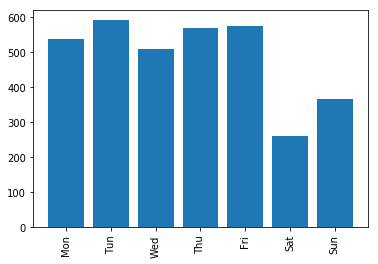

In [335]:
x = activity_result['activity_over_week'].index.values
y = activity_result['activity_over_week']
x_labels = ["Mon","Tun","Wed","Thu", "Fri", "Sat", "Sun"]
plt.xticks(x, x_labels, rotation='vertical')
plt.ylabel = "Number of messages"
plt.xlabel = "Day of week"
plt.bar(x, y)

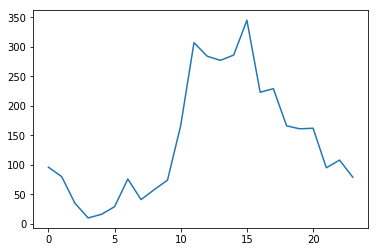

In [336]:
x = activity_result['activity_over_day'].index.values
y = activity_result['activity_over_day']
plt.ylabel = "Number of messages"
plt.xlabel = "Hour of day"
plt.plot(x,y)

<Container object of 12 artists>

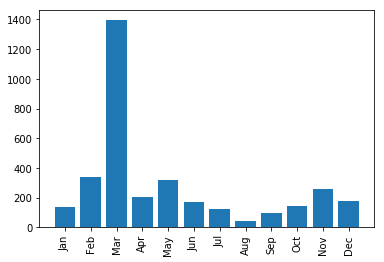

In [337]:
x = activity_result['activity_over_year'].index.values
y = activity_result['activity_over_year']
x_labels = ["Jan","Feb","Mar","Apr", "May", "Jun", "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"]
plt.xticks(x, x_labels, rotation='vertical')
plt.ylabel = "Number of messages"
plt.xlabel = "Month of year"
plt.bar(x, y)

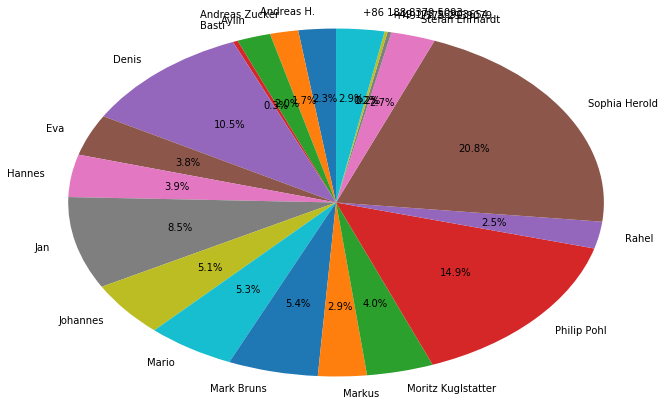

In [338]:
labels = activity_result['activity_members_messages'].index.values
sizes = activity_result['activity_members_messages']

b = plt.pie(sizes, labels=labels, autopct='%1.1f%%',startangle=90, radius=2.0)

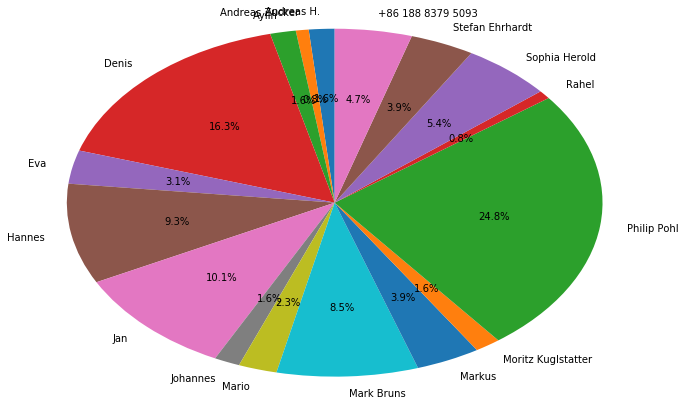

In [339]:
labels = activity_result['acitivity_members_images'].index.values
sizes = activity_result['acitivity_members_images']

b = plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90, radius=2.0)
# percent = 100.*sizes/sizes.sum()
# patches, texts, dummy = plt.pie(sizes, autopct='%1.1f%%',
#         shadow=True, startangle=90, radius=1.5)
# labels_2 = ['{0} - {1:1.1f} %'.format(i,j) for i,j in zip(labels, percent)]
# plt.legend(a, labels_2, loc='best', bbox_to_anchor=(-0.1, 1.),
#            fontsize=8)